### 문자데이터
* 문자형 데이터
    - 사이킷런은 문자열 값을 입력 값으로 처리 하지 않기 때문에 숫자형으로 변환해야 한다
    
#### LabelEncoder
* 문자를 숫자로 변환해주는 기능
* fit(값) : 변경하고자 하는 문자열 등록 기능
* transform(값) : fit으로 등록한 문자열을 적용해주는 기능
* fit_transform : fit과 transform의 두가지 기능을 합친 것
* inverse_transform(값) : 변환된 숫자를 원래 값(문자)으로 표현
* classes_ : 숫자로 변환된 문자를 표현해 준다. 표현된 값은 0번째 번호부터 순차적으로 나온다.

In [1]:
import pandas as pd
df = pd.read_csv('data/test4.csv')
df

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( df['name'] )
df['name'] = le.transform( df['name'] )
df

,name,color
0,0,red
1,1,yellow
2,2,red
3,3,green


In [3]:
df['color_num'] = le.fit_transform(df['color'])
df

,name,color,color_num
0,0,red,1
1,1,yellow,2
2,2,red,1
3,3,green,0


In [4]:
print(df['color'].unique())
df['color_num'].unique()

['red' 'yellow' 'green']


array([1, 2, 0])

In [5]:
le.inverse_transform( df['color_num'] )

array(['red', 'yellow', 'red', 'green'], dtype=object)

### dic을 이용한 문자 변환
* 키, 값의 하나의 쌍으로 사용자가 직접 숫자를 부여하는 방식
* map 함수를 이용하여 해당 키와 동일한 이름에 숫자 부여


In [6]:
items = {'red':0, 'yellow':1, 'green':2}
df['color-dic'] = df['color'].map(items)
df

,name,color,color_num,color-dic
0,0,red,1,0
1,1,yellow,2,1
2,2,red,1,0
3,3,green,0,2


### to_numeric을 이용한 타입 변경
* 문자형태의 숫자값은 형변황르 통해 변경. 예 '100' => 100
* 문자형태의 문자는 변경 불가능 예) '홍길동' (안됨)

In [7]:
df=pd.DataFrame({
    'id':[302,504,708,103,343,565],
    'name':['Watch','Camera','Phone','Shoes','Laptop','Bed'],
    'cost':["300","400","350","100","1000","400"],
    'flt':["30.1","40.1","35.1","10.1","10.1","40.1"]
    
})
df

,id,name,cost,flt
0,302,Watch,300,30.1
1,504,Camera,400,40.1
2,708,Phone,350,35.1
3,103,Shoes,100,10.1
4,343,Laptop,1000,10.1
5,565,Bed,400,40.1


In [8]:
df_copy = df.copy()

In [9]:
df_copy.dtypes

id       int64
name    object
cost    object
flt     object
dtype: object

In [10]:
df_copy['cost'] = pd.to_numeric(df_copy['cost'])
df_copy.dtypes

id       int64
name    object
cost     int64
flt     object
dtype: object

In [11]:
df_copy['flt'] = pd.to_numeric(df_copy['flt'])
df_copy.dtypes

id        int64
name     object
cost      int64
flt     float64
dtype: object

In [12]:
df_copy

,id,name,cost,flt
0,302,Watch,300,30.1
1,504,Camera,400,40.1
2,708,Phone,350,35.1
3,103,Shoes,100,10.1
4,343,Laptop,1000,10.1
5,565,Bed,400,40.1


### astype
* 열 요소의 dtype을 변경하는 함수

In [13]:
df_copy = df.copy()
df_copy.dtypes

id       int64
name    object
cost    object
flt     object
dtype: object

In [14]:
df_copy['flt'] = df_copy['flt'].astype(float)
df_copy['cost'] = df_copy['cost'].astype(int)
df_copy.dtypes

id        int64
name     object
cost      int32
flt     float64
dtype: object

### apply
* 모든 값들을 한번에 연산할 수 있다.


In [15]:
df_copy = df.copy()
df_copy.dtypes

id       int64
name    object
cost    object
flt     object
dtype: object

In [16]:
df_copy[['flt','cost']] = df_copy[['flt','cost']].apply(pd.to_numeric)
df_copy.dtypes

id        int64
name     object
cost      int64
flt     float64
dtype: object

In [17]:
data = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [18]:
import numpy as np
print( np.sum(df['A']) )
print( np.sum(df['B']) )
print( np.sum(df['C']) )

np.sum(df)

6
15
24


A     6
B    15
C    24
dtype: int64

In [19]:
df.apply( np.sum )

A     6
B    15
C    24
dtype: int64

In [20]:
df = pd.read_csv('data/loan-train.csv')

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
print(df.shape)
df.isnull().sum()


(614, 13)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [25]:
import numpy as np
df['Gender'].replace(np.nan, 'Male' , inplace = True)
# df[' Gender ']= df['Gender'].fillna('Male')도 같다.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df['Married']= df['Married'].fillna('No')
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [29]:
df['Dependents']= df['Dependents'].fillna('0')
df['Dependents'].replace('3+', "3", inplace = True)
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [30]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
df['Self_Employed']= df['Self_Employed'].fillna('No')
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [33]:
df['LoanAmount']= df['LoanAmount'].fillna(method='bfill')
df['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [34]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [35]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(method="pad")
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [36]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [37]:
df['Credit_History'].replace(np.nan, 1, inplace = True)
df['Credit_History'].unique()

array([1., 0.])

In [38]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df = pd.read_csv('data/loan-train.csv')

In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
for i in df.columns:
    print(i , '=>', df[i].unique())

Loan_ID => ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001

In [48]:
#결측치 변경하는 함수를 만들어 결측치 치환
def nanChange(col):
    for dic in col:
        for k, v in dic.items():
            if k == 'Self_Employed':
                # method에는 변수를 사용할 수 없어 직접 이름을 써야 한다
                df[k].fillna(method='pad', inplace=True)
            elif k== 'LoanAmount':
                #method에는 변수를 사용할 수 없어 직접 이름을 써야 한다
                df[k].fillna(method='bfill', inplace=True)
            else:
                df[k].fillna(v, inplace=True)
col = [{'Gender':'Male'},{'Married':'Yes'},{'Dependents':df['Dependents'].mode()[0]},{'LoanAmount':'bfill'},
{'Self_Employed':'pad'},{'Loan_Amount_Term':df['Loan_Amount_Term'].mean()},{'Credit_History':1.0}]
df.replace(to_replace = '3+', value='3',inplace=True)
nanChange(col)

In [49]:
# 최종 결과 확인
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [51]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [52]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [55]:
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].unique()

array([0, 1, 2, 3])

In [56]:
le = LabelEncoder()
le.fit( df['Gender'] )
df['Gender_int'] = le.fit_transform(df['Gender'])

In [58]:
df[['Gender_int']]


,Gender_int
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [60]:
items = {'Male':0,'Female':1}
df['Gender_int1'] = df['Gender'].map(items)
df[['Gender','Gender_int1']]

,Gender,Gender_int1
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Male,0
...,...,...
609,Female,1
610,Male,0
611,Male,0
612,Male,0


In [61]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Gender_int             int32
Gender_int1            int64
dtype: object

In [63]:
le = LabelEncoder()
for column in df.columns:
    if type(df[column][0]) == str:
        df[column] = le.fit_transform(df[column])

In [64]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Gender_int             int32
Gender_int1            int64
dtype: object

In [65]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_int,Gender_int1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.140065,5403.459283,1621.245798,146.416938,342.000000,0.855049,1.037459,0.687296,0.817590,0.182410
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.347338,6109.041673,2926.248369,84.917398,64.372489,0.352339,0.787482,0.463973,0.386497,0.386497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [67]:
#1사분위와 3사분위의 값을 각각 구해 딕셔너리에 저장 후 출력
# 아이디는 이상치 값을 따로 구할필요가 없다
q1 = {}
q3 = {}
for key in df.columns:
    if key != 'Loan_ID':
        q1[key] = df[key].describe().loc['25%'] # 1사분위
        q3[key] = df[key].describe().loc['75%'] # 3사분위
print(q1)
print(q3)
#위의 내용을 한눈에 보기 위해 데이터 프레임으로 만들었다.
df_test = pd.DataFrame([q1,q3], index=['1사분위','3사분위'])
#df_test
df_test.T

{'Gender': 1.0, 'Married': 0.0, 'Dependents': 0.0, 'Education': 0.0, 'Self_Employed': 0.0, 'ApplicantIncome': 2877.5, 'CoapplicantIncome': 0.0, 'LoanAmount': 100.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 0.0, 'Loan_Status': 0.0, 'Gender_int': 1.0, 'Gender_int1': 0.0}
{'Gender': 1.0, 'Married': 1.0, 'Dependents': 1.0, 'Education': 0.0, 'Self_Employed': 0.0, 'ApplicantIncome': 5795.0, 'CoapplicantIncome': 2297.25, 'LoanAmount': 166.75, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 2.0, 'Loan_Status': 1.0, 'Gender_int': 1.0, 'Gender_int1': 0.0}


,1사분위,3사분위
Gender,1.0,1.00
Married,0.0,1.00
Dependents,0.0,1.00
Education,0.0,0.00
Self_Employed,0.0,0.00
ApplicantIncome,2877.5,5795.00
CoapplicantIncome,0.0,2297.25
LoanAmount,100.0,166.75
Loan_Amount_Term,360.0,360.00
Credit_History,1.0,1.00


Gender


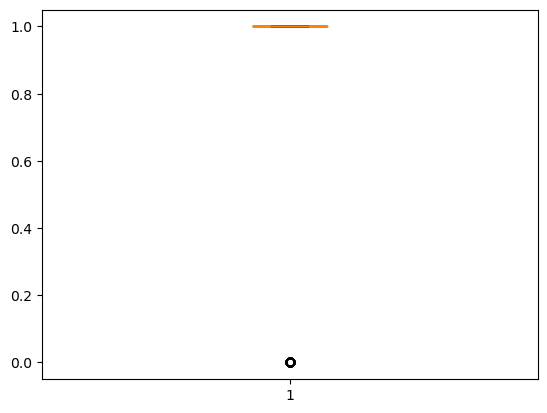

Married


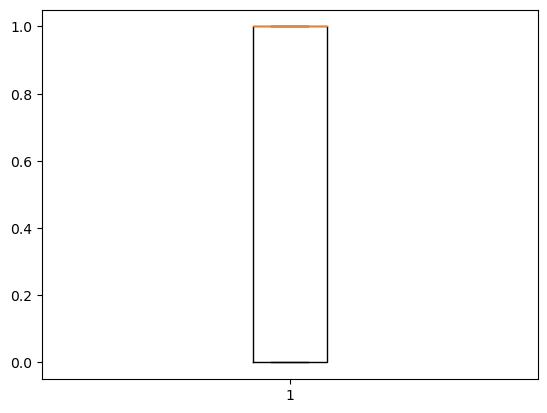

Dependents


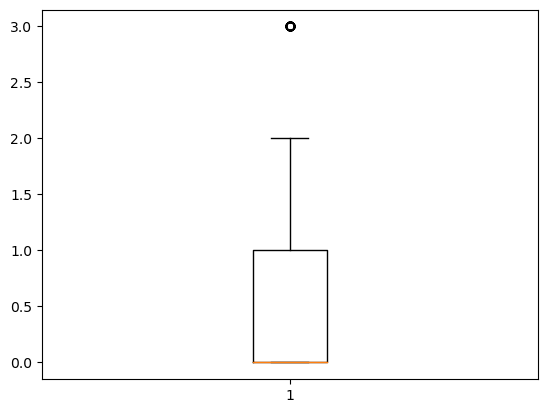

Education


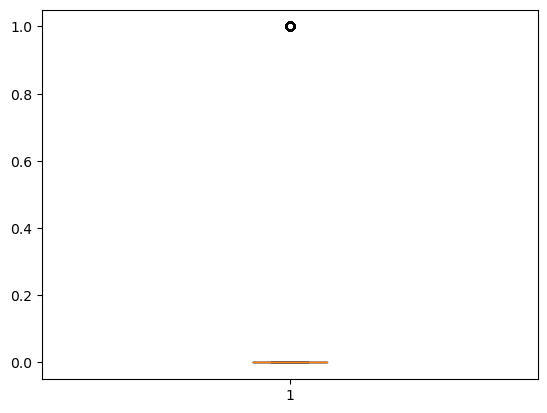

Self_Employed


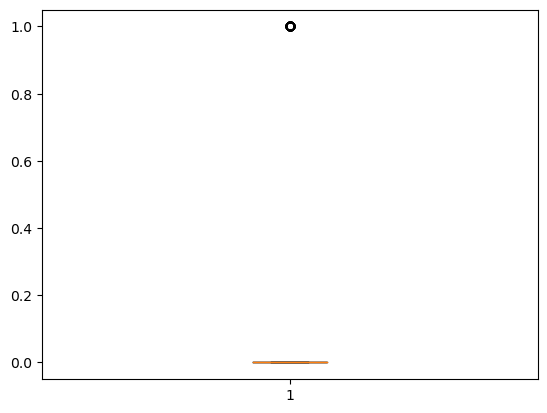

ApplicantIncome


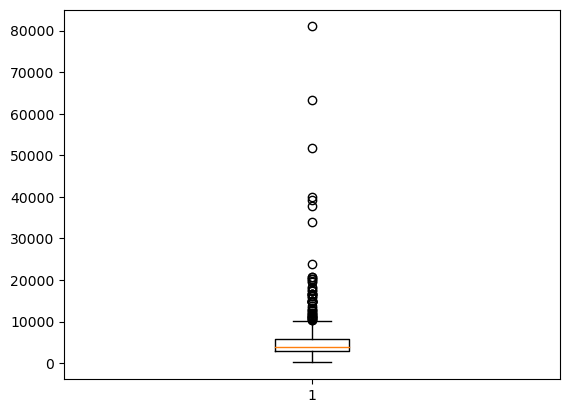

CoapplicantIncome


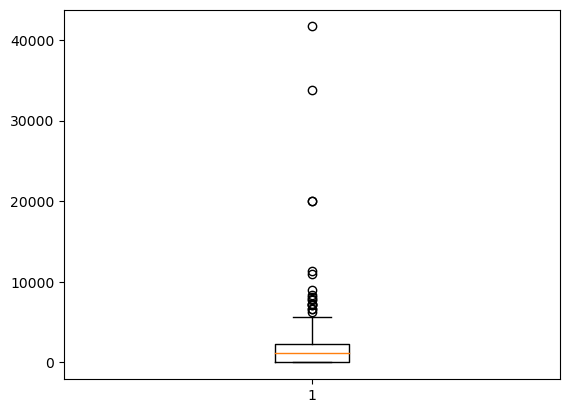

LoanAmount


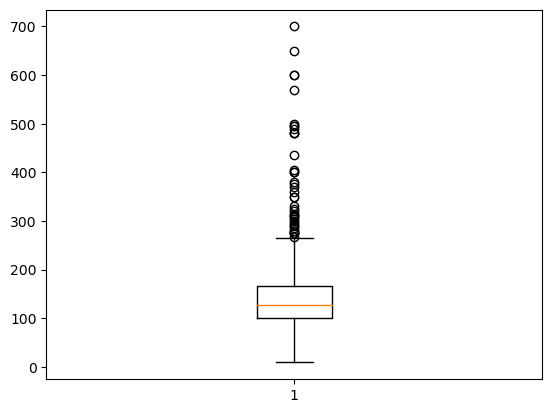

Loan_Amount_Term


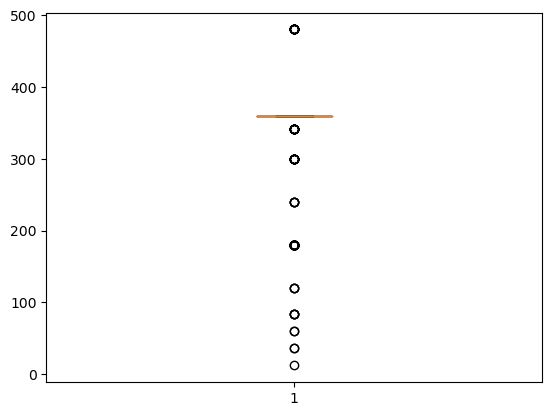

Credit_History


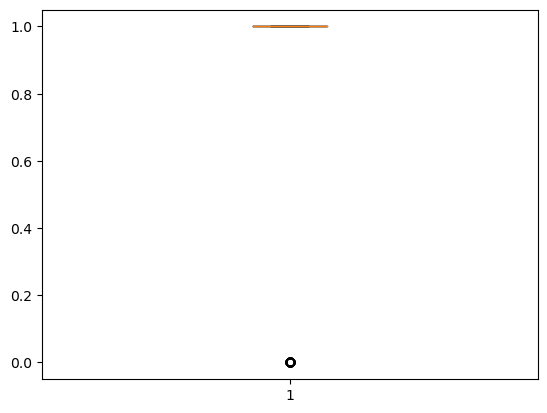

Property_Area


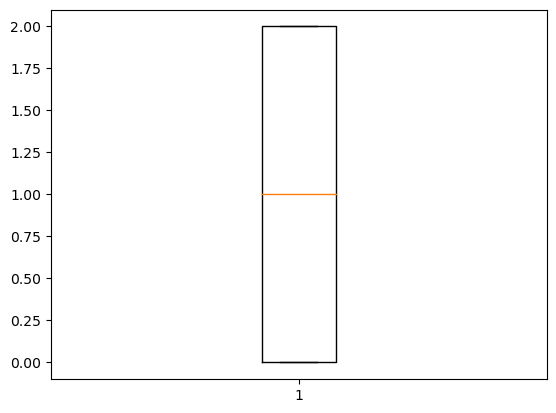

Loan_Status


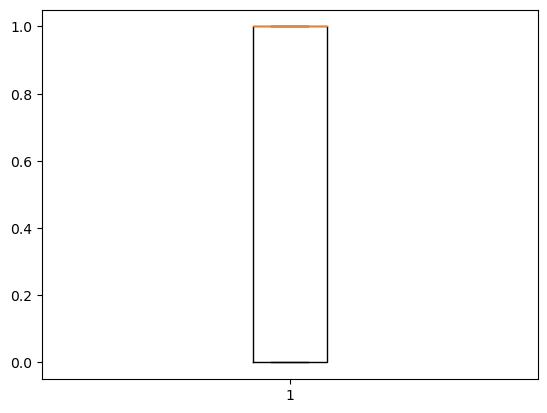

Gender_int


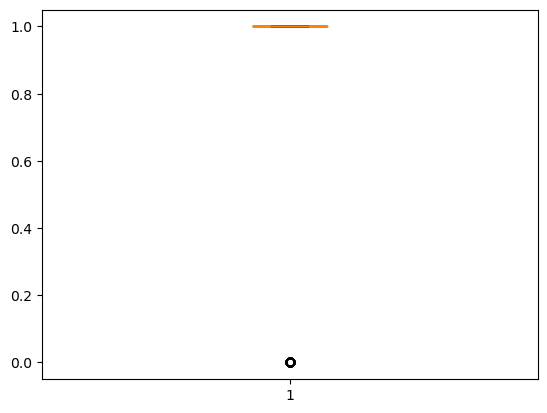

Gender_int1


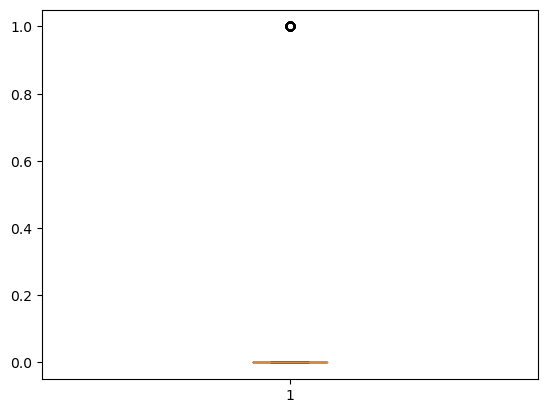

In [68]:
#아이디를 제외한 값들의 boxplot 확인
import matplotlib.pyplot as plt
for column in df.columns:
    if column != 'Loan_ID':
        #print(column, df_train[column].unique())
        print(column)
        plt.boxplot(df[column])
        plt.show()
#결과확인
# Gender성별에서 이상치 가 보이기는 하나 성별은 0,1 둘중 하나이기 때문에 이상치라고 보기 어렵다
#Dependents부양가족 수가 되며 unique()확인해 보면
# Education 교육 여부를 묻는 거고 0,1 두가지이기 때문에 이상치라 보기 어렵다
# Self_Employed 자영업인지 아닌지를 묻고 0,1 이라 이상치라 보기 어렵다
# ApplicantIncome 신청인 소득 역시 수치로 봤을때 문제는 없어 보인다
# CoapplicantIncome 공동 신청자 소득 역시 문제는 없어 보인다
# LoanAmount 대출금 역시 문제 없어 보인다
# Loan_Amount_Term 대출_금액_기간 역시 문제는 없어 보인다
# Credit_History 신용기록도 0,1 두가지라 문제 없어 보인다

In [70]:
df.duplicated().sum()


0